In [17]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import math
from ngboost import NGBClassifier
from scipy.stats import norm

In [31]:
X = np.random.normal(0,1,10000)[...,None]
norm_cdf = norm.cdf(X)
y = np.array([np.random.binomial(1,p) for p in norm_cdf])

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [27]:
def train_model(max_depth=3,n_estimators=500,ordinary_gradient=False,early_stopping_rounds=None) :
    tree = DecisionTreeRegressor(criterion='friedman_mse', max_depth=max_depth)


    if ordinary_gradient :
        model = NGBClassifier(Base=tree,n_estimators=n_estimators,natural_gradient=False)
    else :
        model = NGBClassifier(Base=tree,n_estimators=n_estimators)

    if early_stopping_rounds is not None :
        model.fit(X_train,y_train,
                  X_val=X_test,
                  Y_val=y_test,
                  early_stopping_rounds=early_stopping_rounds
                )
    else :
        model.fit(X_train,y_train,
                  X_val=X_test,
                  Y_val=y_test
                )
    
    return model

model_0 = train_model(ordinary_gradient=True,n_estimators=500)
model_1 = train_model(n_estimators=500)

c:\Users\natha\Documents\machine_learning\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\natha\Documents\machine_learning\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[iter 0] loss=0.6931 val_loss=0.6865 scale=8.0000 norm=4.0000
[iter 100] loss=0.5030 val_loss=0.5075 scale=16.0000 norm=5.6162
[iter 200] loss=0.4939 val_loss=0.5001 scale=32.0000 norm=10.6310
[iter 300] loss=0.4921 val_loss=0.4998 scale=32.0000 norm=10.5463
[iter 400] loss=0.4910 val_loss=0.5000 scale=16.0000 norm=5.2588


c:\Users\natha\Documents\machine_learning\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\Users\natha\Documents\machine_learning\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[iter 0] loss=0.6931 val_loss=0.6865 scale=2.0000 norm=4.0000
[iter 100] loss=0.5023 val_loss=0.5066 scale=2.0000 norm=3.6596
[iter 200] loss=0.4936 val_loss=0.4997 scale=2.0000 norm=3.8382
[iter 300] loss=0.4929 val_loss=0.4995 scale=1.0000 norm=1.9331
[iter 400] loss=0.4927 val_loss=0.4996 scale=0.5000 norm=0.9706


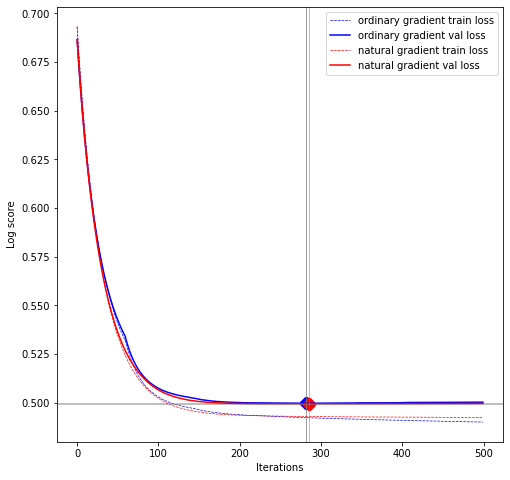

In [28]:
def plot_training(model_ordinary_gradient, model_natural_gradient) :
    val_0 = np.array(model_ordinary_gradient.evals_result['val']['LOGSCORE'])
    train_0 = np.array(model_ordinary_gradient.evals_result['train']['LOGSCORE'])
    val_1 = np.array(model_natural_gradient.evals_result['val']['LOGSCORE'])
    train_1 = np.array(model_natural_gradient.evals_result['train']['LOGSCORE'])
    fig, ax = plt.subplots(figsize = (8,8))
    ax.plot(train_0,'--',color='blue',linewidth=0.7,label='ordinary gradient train loss')
    ax.plot(val_0,color='blue',label='ordinary gradient val loss')
    ax.scatter(val_0.argmin(),val_0.min(),color='blue',marker='D',linewidths=5)
    ax.axvline(x=val_0.argmin(),color='grey',linewidth=0.5)
    ax.axhline(y=val_0.min(),color='grey',linewidth=0.5)
    ax.axvline(x=val_0.argmin(),color='grey',linewidth=0.5)
    ax.plot(train_1,'--',color='red',linewidth=0.7,label='natural gradient train loss')
    ax.plot(val_1,color='red',label='natural gradient val loss')
    ax.scatter(val_1.argmin(),val_1.min(),color='red',marker='D',linewidths=5)
    ax.axvline(x=val_1.argmin(),color='grey',linewidth=0.5)
    ax.axhline(y=val_1.min(),color='grey',linewidth=0.5)
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Log score')
    ax.legend(loc='upper right')
    plt.show()

plot_training(model_0,model_1)

(array([2872., 2394., 1759., 3055., 1970., 2771., 2733., 2713., 2048.,
        2685.]),
 array([0.00142077, 0.10108699, 0.20075321, 0.30041943, 0.40008565,
        0.49975187, 0.59941809, 0.69908431, 0.79875053, 0.89841675,
        0.99808297]),
 <BarContainer object of 10 artists>)

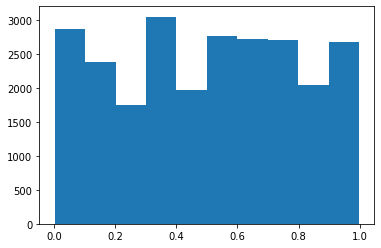

In [29]:
probs = model_1.pred_dist(X_test).params['p1']
plt.hist(probs,bins=10)